In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array, plot_model
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
!unzip Animals.zip

Archive:  Animals.zip
  inflating: cats/0_0001.jpg         
  inflating: cats/0_0002.jpg         
  inflating: cats/0_0003.jpg         
  inflating: cats/0_0004.jpg         
  inflating: cats/0_0005.jpg         
  inflating: cats/0_0006.jpg         
  inflating: cats/0_0007.jpg         
  inflating: cats/0_0008.jpg         
  inflating: cats/0_0009.jpg         
  inflating: cats/0_0010.jpg         
  inflating: cats/0_0011.jpg         
  inflating: cats/0_0012.jpg         
  inflating: cats/0_0013.jpg         
  inflating: cats/0_0014.jpg         
  inflating: cats/0_0015.jpg         
  inflating: cats/0_0016.jpg         
  inflating: cats/0_0017.jpg         
  inflating: cats/0_0018.jpg         
  inflating: cats/0_0019.jpg         
  inflating: cats/0_0020.jpg         
  inflating: cats/0_0021.jpg         
  inflating: cats/0_0022.jpg         
  inflating: cats/0_0023.jpg         
  inflating: cats/0_0024.jpg         
  inflating: cats/0_0025.jpg         
  inflating: cats/0_0026.jpg

In [2]:
dataset_path = 'Animals'

# Data generators for the model from scratch
train_datagen_scratch = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Data generators for the VGG16 model
train_datagen_vgg16 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# Generators for the model from scratch
train_generator_scratch = train_datagen_scratch.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator_scratch = train_datagen_scratch.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Generators for the VGG16 model
train_generator_vgg16 = train_datagen_vgg16.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator_vgg16 = train_datagen_vgg16.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [3]:
class_indices = train_generator_scratch.class_indices
indices_to_class = {v: k for k, v in class_indices.items()}

# Print class indices mapping for verification
print("Class indices:", class_indices)
print("Indices to class mapping:", indices_to_class)

# Class names
class_names = list(class_indices.keys())

Class indices: {'cats': 0, 'dogs': 1, 'snakes': 2}
Indices to class mapping: {0: 'cats', 1: 'dogs', 2: 'snakes'}


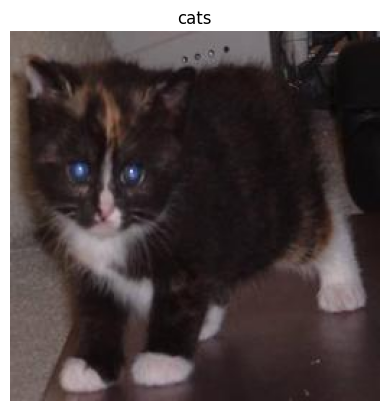

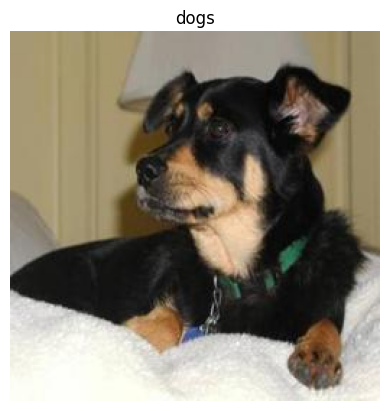

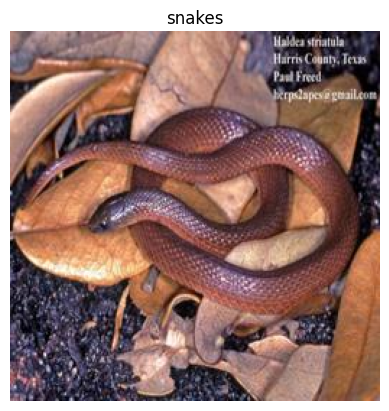

In [5]:
def plot_images(generator, class_names, num_images=1):
    for class_name in class_names:
        class_index = generator.class_indices[class_name]
        img_batch, label_batch = next(generator)
        img_class_indices = np.argmax(label_batch, axis=1)
        idx = np.where(img_class_indices == class_index)[0][0]
        plt.imshow(img_batch[idx])
        plt.title(class_name)
        plt.axis('off')
        plt.show()

# Plot images
plot_images(train_generator_scratch, class_names)

# Reset the generator after using it for visualization
train_generator_scratch.reset()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


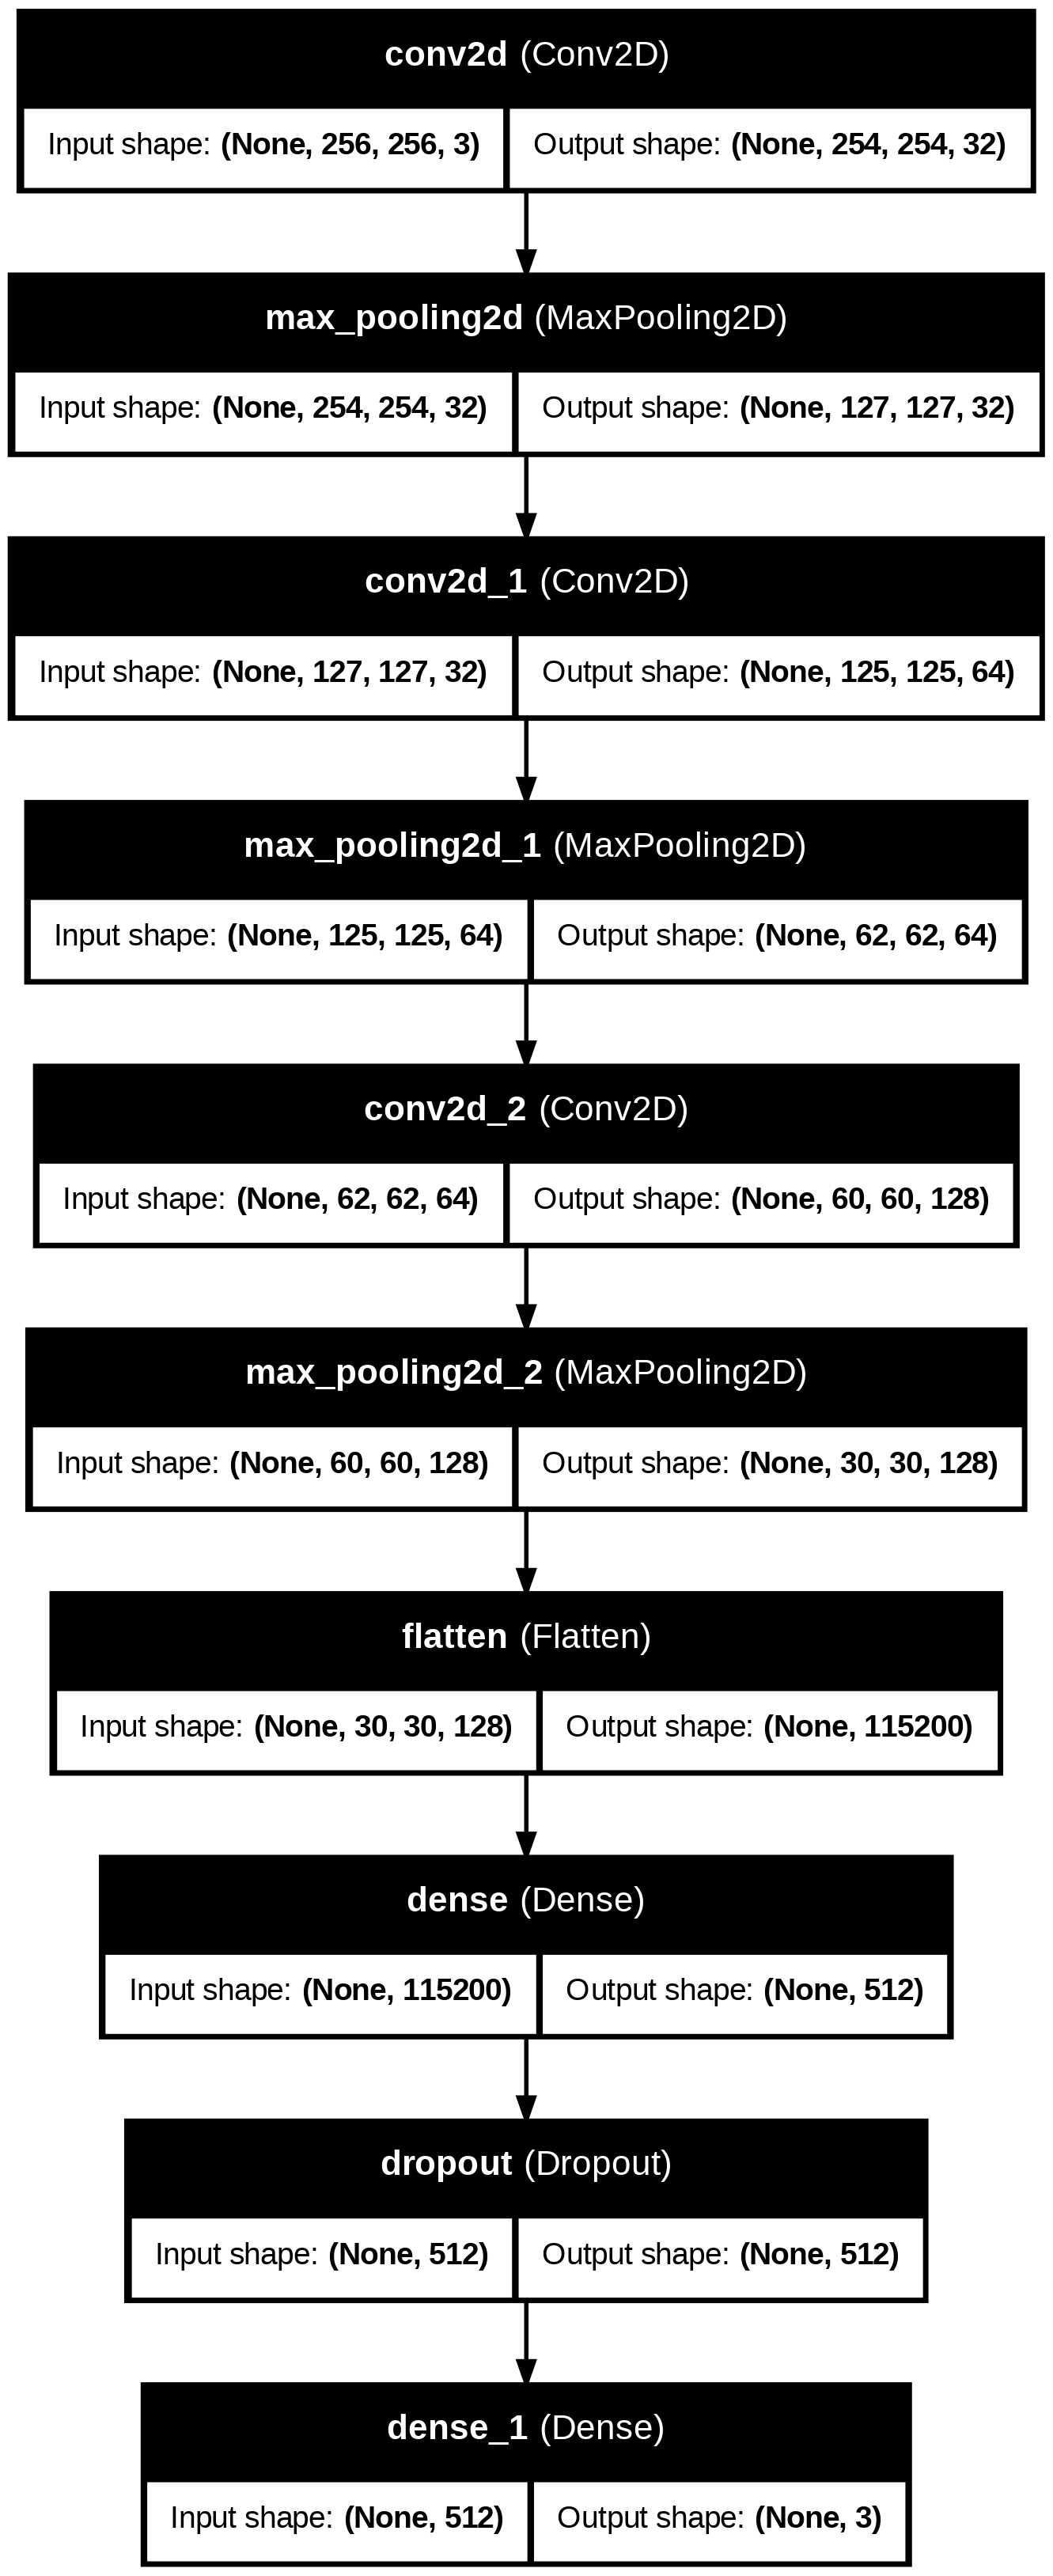

In [6]:
# Model from scratch
model_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model_scratch.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Plot model structure for model from scratch
plot_model(model_scratch, to_file='model_scratch.png', show_shapes=True, show_layer_names=True)

In [7]:
# Train model from scratch
history_scratch = model_scratch.fit(
    train_generator_scratch,
    epochs=10,
    validation_data=validation_generator_scratch
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.4202 - loss: 2.2380 - val_accuracy: 0.6033 - val_loss: 0.7862
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.6562 - loss: 0.7627 - val_accuracy: 0.6350 - val_loss: 0.7738
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.7025 - loss: 0.6615 - val_accuracy: 0.6683 - val_loss: 0.7202
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.7957 - loss: 0.5187 - val_accuracy: 0.6917 - val_loss: 0.7079
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.8551 - loss: 0.3763 - val_accuracy: 0.6967 - val_loss: 0.8041
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9164 - loss: 0.2233 - val_accuracy: 0.6867 - val_loss: 1.0427
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.9379 - loss: 0.1810 - val_accuracy: 0.6917 - val_loss: 1.1543
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9715 - loss: 0.0974 - val_accuracy: 0.7067 - val_

In [8]:
# Transfer learning with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

model_transfer = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

for layer in base_model.layers:
    layer.trainable = False

model_transfer.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Output model structure before training
model_transfer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,104,323 (88.14 MB)

 Trainable params: 8,389,635 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# Train model with transfer learning
history_transfer = model_transfer.fit(
    train_generator_vgg16,
    epochs=10,
    validation_data=validation_generator_vgg16
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 423ms/step - accuracy: 0.8728 - loss: 5.4269 - val_accuracy: 0.9833 - val_loss: 2.2342
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 216ms/step - accuracy: 0.9779 - loss: 1.3421 - val_accuracy: 0.9817 - val_loss: 1.6768
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 216ms/step - accuracy: 0.9887 - loss: 0.8970 - val_accuracy: 0.9833 - val_loss: 1.9777
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.9929 - loss: 0.4363 - val_accuracy: 0.9883 - val_loss: 1.5069
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.9950 - loss: 0.1884 - val_accuracy: 0.9733 - val_loss: 2.4951
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.9944 - loss: 0.2975 - val_accuracy: 0.9783 - val_loss: 2.3789
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 0.9934 - loss: 0.2691 - val_accuracy: 0.9717 - val_loss: 3.4628
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.9959 - loss: 0.2281 - val_accu

In [11]:
# Compare results
print("Model from scratch validation accuracy: ", history_scratch.history['val_accuracy'][-1])
print("Transfer learning model validation accuracy: ", history_transfer.history['val_accuracy'][-1])

Model from scratch validation accuracy:  0.7149999737739563
Transfer learning model validation accuracy:  0.9800000190734863


In [23]:
# model_scratch.save('scratch_learning_model.h5')
# model_transfer.save('transfer_learning_model.h5')

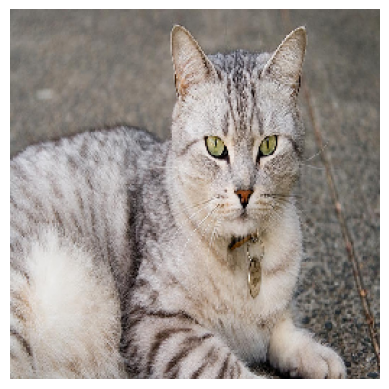

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model from scratch prediction: snakes with confidence 51.89%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Transfer learning model prediction: cats with confidence 57.61%


In [15]:
# Load and preprocess the image
image_path = 'another_cat.jpg'
img = load_img(image_path, target_size=(256, 256))
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess for the model from scratch
img_array_scratch = img_to_array(img)
img_array_scratch = img_array_scratch / 255.0  # Rescale for the scratch model
img_array_scratch = np.expand_dims(img_array_scratch, axis=0)

# Prediction with model from scratch
predictions_scratch = model_scratch.predict(img_array_scratch)
score_scratch = tf.nn.softmax(predictions_scratch[0])
predicted_class_index = tf.argmax(score_scratch).numpy()
predicted_class_scratch = indices_to_class[predicted_class_index]

print(f"Model from scratch prediction: {predicted_class_scratch} with confidence {100 * tf.reduce_max(score_scratch):.2f}%")

# Preprocess for the VGG16 model
img_array_vgg16 = img_to_array(img)
img_array_vgg16 = preprocess_input(img_array_vgg16)
img_array_vgg16 = np.expand_dims(img_array_vgg16, axis=0)

# Prediction with transfer learning model
predictions_transfer = model_transfer.predict(img_array_vgg16)
score_transfer = tf.nn.softmax(predictions_transfer[0])
predicted_class_index_transfer = tf.argmax(score_transfer).numpy()
predicted_class_transfer = indices_to_class[predicted_class_index_transfer]

print(f"Transfer learning model prediction: {predicted_class_transfer} with confidence {100 * tf.reduce_max(score_transfer):.2f}%")